In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 

In [13]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')


In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

In [16]:
 #data cleaning
#EDA
#text preprocessing
#modelbuilding 
#evaluation
#improvement
#website
#deploy


## 1.DATA CLEANING

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')


In [20]:
df.sample(5)

,v1,v2
423,spam,URGENT! Your Mobile number has been awarded wi...
2350,ham,You will be in the place of that man
5315,ham,Hahaha..use your brain dear
3680,ham,LOL what happens in Vegas stays in vegas
1010,ham,Lol I would but my mom would have a fit and te...


In [21]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
1891,ham,Probably earlier than that if the station's wh...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
2395,ham,"Babe, I'm back ... Come back to me ..."
183,ham,"He will, you guys close?"
904,ham,"We're all getting worried over here, derek and..."
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...
3177,ham,K k :-):-) then watch some films.
2749,ham,You said not now. No problem. When you can. Le...
3052,ham,Pls send me the correct name da.
2334,ham,Do you like Italian food?


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()


In [23]:
df['target']=encoder.fit_transform(df['target'])

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.isnull().sum()


target    0
text      0
dtype: int64

In [26]:
df.duplicated().sum()

403

In [27]:
df=df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x27b64c918b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

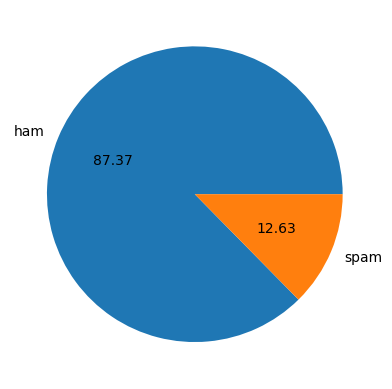

In [30]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [31]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# data imbalance
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Divyansh
[nltk_data]     Pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_characters']=df['text'].apply(len)

In [34]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
from nltk.tokenize import word_tokenize
df['text'] = df['text'].apply(lambda x: word_tokenize(x))


# num of words


In [36]:
df['num_word'] = df['text'].apply(lambda x: len(x))

In [37]:
df.head()

,target,text,num_characters,num_word
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15


In [38]:
df.sample(10)

,target,text,num_characters,num_word
3751,0,"[Why, are, u, up, so, early, ?]",22,7
3198,0,"[No, de.am, seeing, in, online, shop, so, that...",47,11
2436,0,"[Btw, regarding, that, we, should, really, try...",114,24
4956,0,"[I, 'm, vivek, :, ), i, got, call, from, your,...",39,12
5070,0,"[As, in, different, styles, ?]",23,5
3492,0,"[Cool, ,, text, me, when, you, head, out]",31,8
808,0,"[I, am, taking, half, day, leave, bec, i, am, ...",44,11
2242,0,"[Nope, wif, my, sis, lor, ..., Aft, bathing, m...",96,24
4457,0,"[Die, ..., I, accidentally, deleted, e, msg, i...",89,22
2002,1,"[TheMob, >, Yo, yo, yo-Here, comes, a, new, se...",143,32


In [39]:

df.head()

,target,text,num_characters,num_word
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15


In [40]:
df[['num_characters','num_word']].describe()

,num_characters,num_word
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [41]:
#spam
df[df['target'] == 1][['num_characters','num_word']].describe()

,num_characters,num_word
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


In [42]:

# ham
df[df['target'] == 0][['num_characters','num_word']].describe()


,num_characters,num_word
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [43]:

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

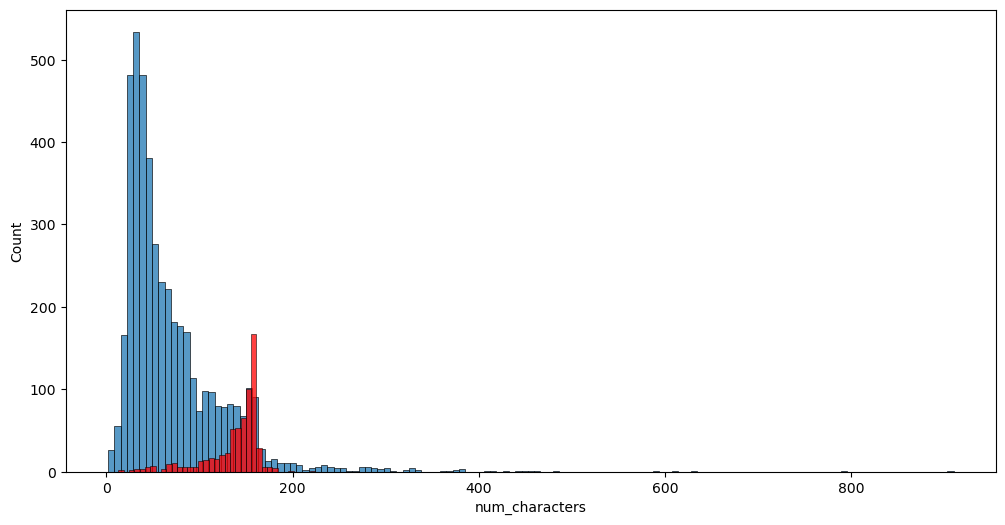

In [44]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

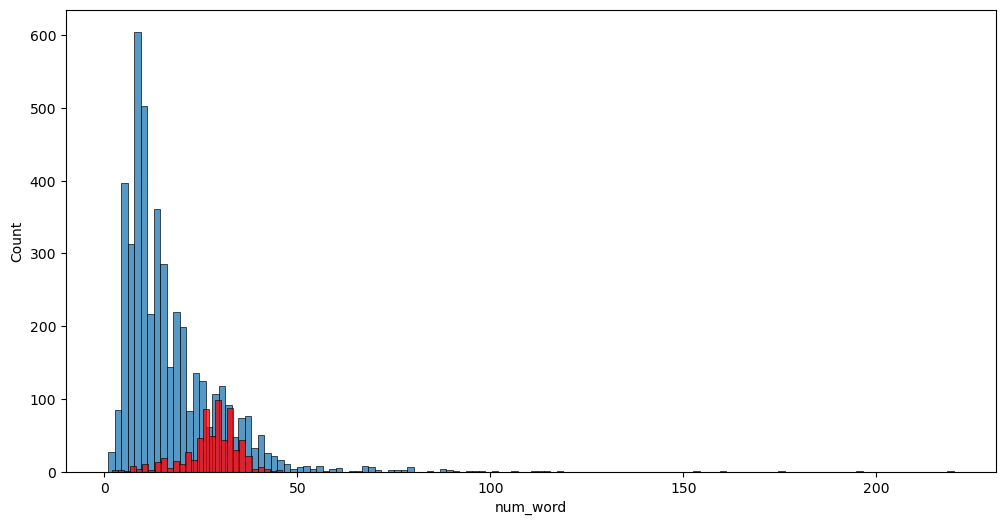

In [45]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')

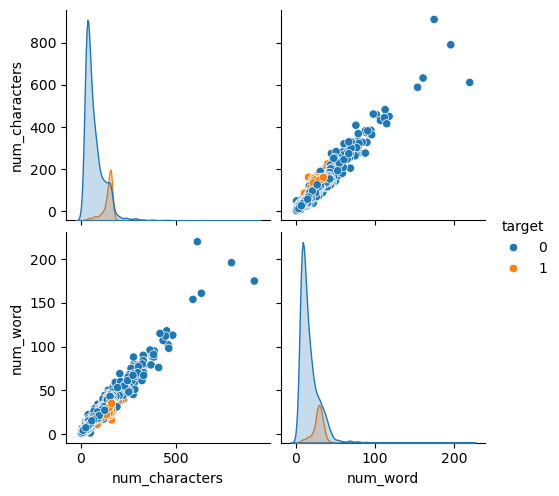

In [46]:
sns.pairplot(df,hue='target')

In [47]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

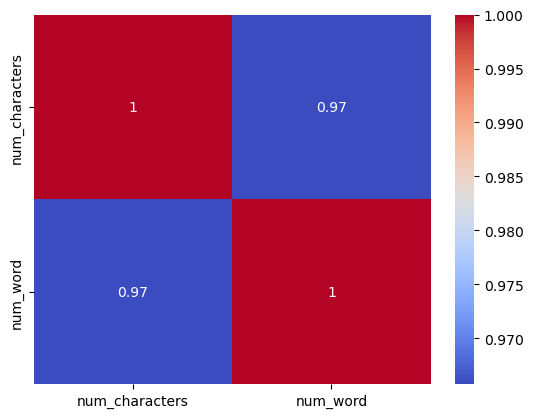

In [48]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

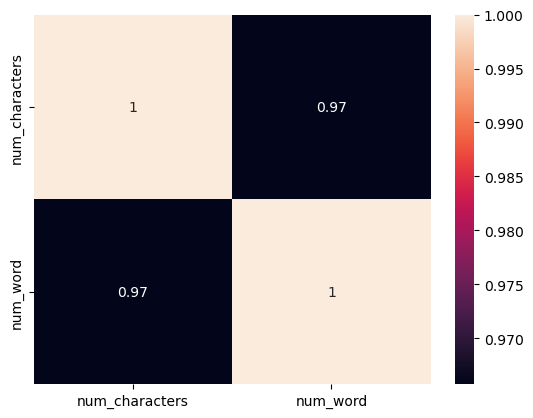

In [49]:
sns.heatmap(df[['num_characters', 'num_word', ]].corr(), annot=True)

In [50]:
# 3. Data Preprocessing
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [51]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:  
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [52]:
# from nltk.corpus import stopwords
# stopwords.words('english')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Divyansh
[nltk_data]     Pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [54]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

NameError: name 'ps' is not defined

In [ ]:

transform_text("did you like my presentation on ml")

In [ ]:
df['text'][0]

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['transformed_text'] = df['text'].apply(transform_text)


In [ ]:
df['text'].apply(type).value_counts()


In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [ ]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
df.head()

In [ ]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [71]:
from collections import Counter
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'ham_corpus' is not defined

##MODEL BUILDER

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:

X.shape

In [ ]:

y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:


performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df

In [ ]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:

new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

# Define base models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)  # Use probability=True for soft voting

# Create the voting classifier
voting = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('svc', model3)
], voting='soft')

# Fit the ensemble
voting.fit(X_train, y_train)

# Predict
y_pred = voting.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


In [ ]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))